In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp

In [2]:
data = pd.read_csv("AC_CLASSROOM.csv")

In [3]:
data.head(3)

,Timestamp,CO (ppm),NO2 (ppm),CO2 (ppm),TVOC (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temperature (C),Humidity (%),Sound (dB),Occupancy,Position,Room Condition,Room Type,Floor No.,Weather,Occupancy_Classified
0,2023-08-22 11:40:09,$,$,500.0,0.0,41.0,62.0,67.0,25.8,13.9,74.3,2.0,middle,ac,classroom,3.0,overcast,Occ_Class_1
1,2023-08-22 11:40:15,$,$,501.0,0.0,41.0,61.0,67.0,25.8,13.9,72.5,2.0,middle,ac,classroom,3.0,overcast,Occ_Class_1
2,2023-08-22 11:40:21,$,$,502.0,0.0,40.0,61.0,67.0,25.8,13.9,67.8,2.0,middle,ac,classroom,3.0,overcast,Occ_Class_1


In [4]:
set(data.columns)

{'CO (ppm)',
 'CO2 (ppm)',
 'Floor No.',
 'Humidity (%)',
 'NO2 (ppm)',
 'Occupancy',
 'Occupancy_Classified',
 'PM1 (ug/m3)',
 'PM10 (ug/m3)',
 'PM2.5 (ug/m3)',
 'Position',
 'Room Condition',
 'Room Type',
 'Sound (dB)',
 'TVOC (ppb)',
 'Temperature (C)',
 'Timestamp',
 'Weather'}

In [5]:
data.shape

(3654, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             3654 non-null   object 
 1   CO (ppm)              3654 non-null   object 
 2   NO2 (ppm)             3654 non-null   object 
 3   CO2 (ppm)             3654 non-null   float64
 4   TVOC (ppb)            3654 non-null   float64
 5   PM1 (ug/m3)           3654 non-null   float64
 6   PM2.5 (ug/m3)         3654 non-null   float64
 7   PM10 (ug/m3)          3654 non-null   float64
 8   Temperature (C)       3654 non-null   float64
 9   Humidity (%)          3654 non-null   float64
 10  Sound (dB)            3654 non-null   float64
 11  Occupancy             3654 non-null   float64
 12  Position              3654 non-null   object 
 13  Room Condition        3654 non-null   object 
 14  Room Type             3654 non-null   object 
 15  Floor No.            

In [7]:
data.isna().sum()

Timestamp               0
CO (ppm)                0
NO2 (ppm)               0
CO2 (ppm)               0
TVOC (ppb)              0
PM1 (ug/m3)             0
PM2.5 (ug/m3)           0
PM10 (ug/m3)            0
Temperature (C)         0
Humidity (%)            0
Sound (dB)              0
Occupancy               0
Position                0
Room Condition          0
Room Type               0
Floor No.               0
Weather                 0
Occupancy_Classified    0
dtype: int64

In [8]:
for i in data:
    print(data[(data[i]=='$')].value_counts().sum())

0
319
319
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [9]:
data = data.drop(['CO (ppm)','NO2 (ppm)'],axis=1)

In [10]:
data.describe()

,CO2 (ppm),TVOC (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temperature (C),Humidity (%),Sound (dB),Occupancy,Floor No.
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.0
mean,2924.863437,7.929392,20.427203,32.538862,36.519157,28.164943,15.066612,74.269677,36.460865,3.0
std,1123.870943,29.960672,11.737434,16.660751,17.448514,1.086633,0.540226,3.726639,16.763781,0.0
min,500.000000,0.000000,4.000000,7.000000,7.000000,25.600000,13.800000,64.600000,0.000000,3.0
25%,2497.000000,0.000000,7.000000,15.000000,18.000000,27.800000,14.900000,71.700000,30.000000,3.0
50%,3049.500000,0.000000,24.000000,37.000000,43.000000,28.100000,15.000000,73.900000,44.000000,3.0
75%,3511.750000,0.000000,28.000000,44.000000,48.000000,28.400000,15.200000,76.975000,48.000000,3.0
max,5000.000000,170.000000,51.000000,79.000000,83.000000,31.100000,16.600000,87.800000,54.000000,3.0


In [11]:
data

,Timestamp,CO2 (ppm),TVOC (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temperature (C),Humidity (%),Sound (dB),Occupancy,Position,Room Condition,Room Type,Floor No.,Weather,Occupancy_Classified
0,2023-08-22 11:40:09,500.0,0.0,41.0,62.0,67.0,25.8,13.9,74.3,2.0,middle,ac,classroom,3.0,overcast,Occ_Class_1
1,2023-08-22 11:40:15,501.0,0.0,41.0,61.0,67.0,25.8,13.9,72.5,2.0,middle,ac,classroom,3.0,overcast,Occ_Class_1
2,2023-08-22 11:40:21,502.0,0.0,40.0,61.0,67.0,25.8,13.9,67.8,2.0,middle,ac,classroom,3.0,overcast,Occ_Class_1
3,2023-08-22 11:40:26,503.0,0.0,40.0,61.0,66.0,25.8,13.9,68.0,2.0,middle,ac,classroom,3.0,overcast,Occ_Class_1
4,2023-08-22 11:40:32,503.0,0.0,40.0,61.0,65.0,25.8,13.9,68.3,2.0,middle,ac,classroom,3.0,overcast,Occ_Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,2023-09-26 13:20:36,5000.0,62.0,21.0,33.0,36.0,28.1,15.0,78.1,16.0,middle,ac,classroom,3.0,sunny,Occ_Class_2
3650,2023-09-26 13:20:42,5000.0,66.0,21.0,32.0,36.0,28.0,15.0,73.3,11.0,middle,ac,classroom,3.0,sunny,Occ_Class_2
3651,2023-09-26 13:20:47,5000.0,52.0,22.0,33.0,37.0,28.1,15.0,73.2,10.0,middle,ac,classroom,3.0,sunny,Occ_Class_1
3652,2023-09-26 13:20:53,5000.0,52.0,23.0,33.0,37.0,28.0,15.0,76.9,10.0,middle,ac,classroom,3.0,sunny,Occ_Class_1


In [12]:
data['Occupancy_Classified'].value_counts()

Occupancy_Classified
Occ_Class_5    1280
Occ_Class_4     802
Occ_Class_6     655
Occ_Class_2     303
Occ_Class_1     259
Occ_Class_3     190
Occ_Class_0     165
Name: count, dtype: int64

In [13]:
data['Occupancy_Classified'] = data['Occupancy_Classified'].str.replace('Occ_Class_','')

In [14]:
data['Occupancy_Classified']

0       1
1       1
2       1
3       1
4       1
       ..
3649    2
3650    2
3651    1
3652    1
3653    1
Name: Occupancy_Classified, Length: 3654, dtype: object

In [15]:
# data.head()

,Timestamp,CO2 (ppm),TVOC (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temperature (C),Humidity (%),Sound (dB),Occupancy,Position,Room Condition,Room Type,Floor No.,Weather,Occupancy_Classified
0,2023-08-22 11:40:09,500.0,0.0,41.0,62.0,67.0,25.8,13.9,74.3,2.0,middle,ac,classroom,3.0,overcast,1
1,2023-08-22 11:40:15,501.0,0.0,41.0,61.0,67.0,25.8,13.9,72.5,2.0,middle,ac,classroom,3.0,overcast,1
2,2023-08-22 11:40:21,502.0,0.0,40.0,61.0,67.0,25.8,13.9,67.8,2.0,middle,ac,classroom,3.0,overcast,1
3,2023-08-22 11:40:26,503.0,0.0,40.0,61.0,66.0,25.8,13.9,68.0,2.0,middle,ac,classroom,3.0,overcast,1
4,2023-08-22 11:40:32,503.0,0.0,40.0,61.0,65.0,25.8,13.9,68.3,2.0,middle,ac,classroom,3.0,overcast,1


In [21]:
data.shape

(3654, 16)

### Heatmap between Attributes

In [ ]:
# data = data.drop(['Timestamp','Position','Room Condition','Room Type','Weather','Occupancy','Floor No.'],axis=1)
# plt.figure(figsize=(7,7))
# heatmap = sns.heatmap(data.corr(),annot= True,fmt='0.2f',cmap='BrBG',linewidths=0.3,linecolor='black')
# heatmap.set_title("Correlation between Attributes",pad=25,fontdict={'fontsize':20})

### Correlation with Occ_Class

In [ ]:
# plt.figure(figsize=(6,7))
# heatmap = sns.heatmap(data.corr()[['Occupancy_Classified']].sort_values(by='Occupancy_Classified',ascending= False),annot = True,fmt='0.3f',cmap='BrBG',linewidths=0.1,linecolor='black')
# heatmap.set_title("Correlation with Classified Occupancy",fontdict={'fontsize':14},pad=20)

## September 20:
    Position - Middle
    Weather - Cloudy

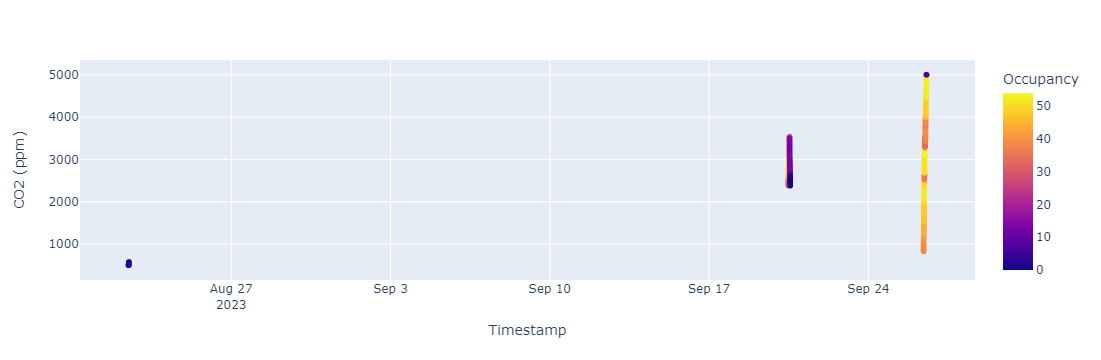

In [22]:
exp.scatter(data_frame=data,x=data['Timestamp'],y=data['CO2 (ppm)'],color=data['Occupancy'])

In [25]:
# exp.line(data_frame=data,x=data['Timestamp'],y=data['CO2 (ppm)'],color=data['Occupancy_Classified'])

In [27]:
# exp.scatter(data_frame= data,x=data['Timestamp'],y=data['CO2 (ppm)'],color=data['Occupancy'],facet_col=data['Position'])

In [28]:
# exp.scatter(data_frame= data,x=data['Timestamp'],y=data['CO2 (ppm)'],color=data['Weather'],height=550)

In [ ]:
# exp.scatter(data_frame=data,x=data['Timestamp'],y=data['Temperature (C)'],color=data['Occupancy'])

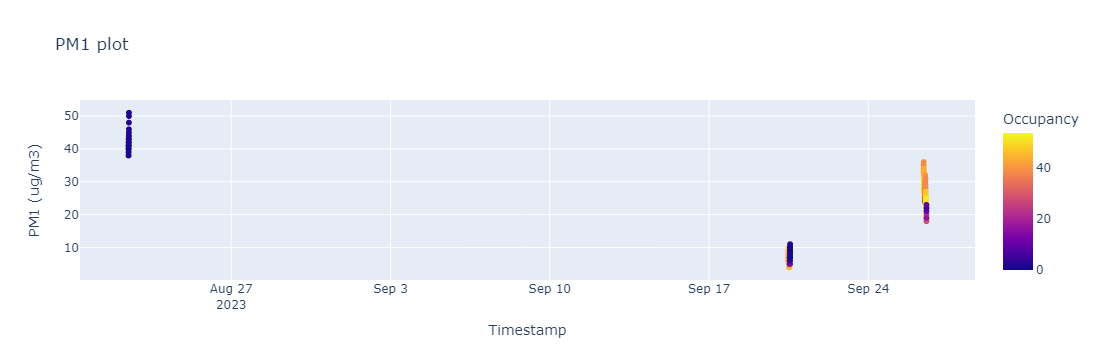

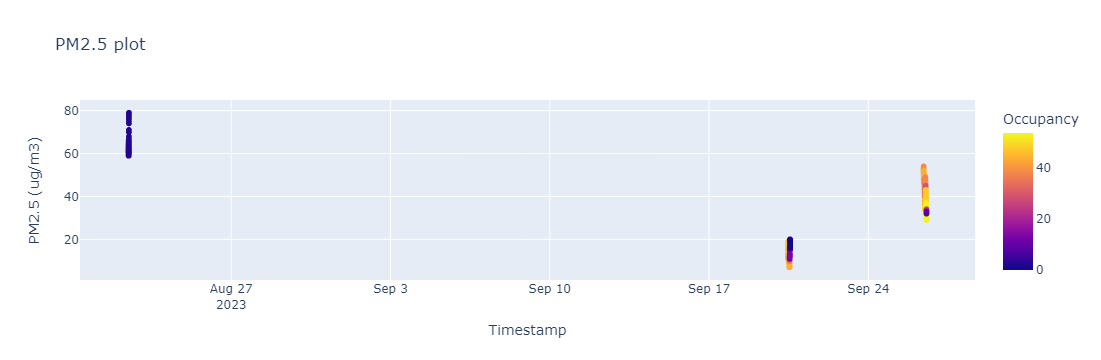

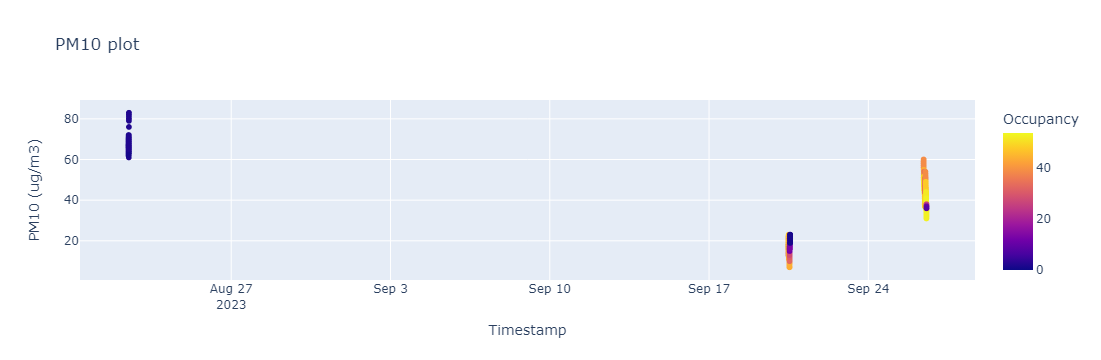

In [31]:
fig1= exp.scatter(data_frame=data,x=data['Timestamp'],y=data['PM1 (ug/m3)'],color=data['Occupancy'],title='PM1 plot')
fig2 = exp.scatter(data_frame=data,x=data['Timestamp'],y=data['PM2.5 (ug/m3)'],color=data['Occupancy'],title='PM2.5 plot')
fig3= exp.scatter(data_frame=data,x=data['Timestamp'],y=data['PM10 (ug/m3)'],color=data['Occupancy'],title='PM10 plot')
fig1.show()
fig2.show()
fig3.show()

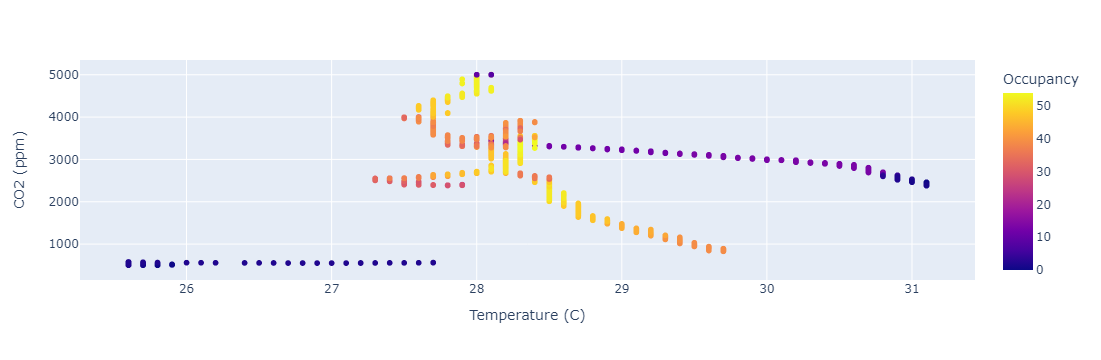

In [33]:
exp.scatter(data_frame=data,x=data['Temperature (C)'],y=data['CO2 (ppm)'],color=data['Occupancy'])